# Saarthak Marathe | ME17B162

In [1]:
# Import required packages
import numpy as np               # for mathematical operations, for arrays
import pandas as pd              # Used for different data manipulation tasks
import matplotlib.pyplot as plt  # Used for Plotting 
import random                    # For random number generator
import warnings
warnings.filterwarnings('ignore')# To avoid warnings note while running the notebook

# Section 1 : Implementing Gradient Descent

Gradient Descent is an first order optimization algorithm to find the local minimum differentiable function (usually a loss function or an objective function). We start with a random point on the function and move in the negative direction of the gradient of the function to reach the find minimum.

Let $F(x)$ be a differentiable function parameterised by $x$ and $x^*$ be the parameter value which minimises $F(x)$. The initial value is $x_0=a_0$. To determine $x^*$ using gradient descent, at each of the $i^{th}$ the parameter updation rule is:

\begin{align*}
x_i = x_{i-1} - \eta \nabla F(a_{i-1}), \hspace{1cm} i\geq 1
\end{align*}  
where $x_i$ is updated value of the parameter in the $i^{th}$ iteration. 

\begin{align*}
\eta \nabla F(a_{i-1}) = \eta \frac{dF}{dx}\bigr \rvert_{x=a_{i-1}}
\end{align*} 

**Stopping Criteria**: Following are three ways which are used as stopping criteria in gradient descent algorithm:
1. Limiting number of iterations
2. Threshold for change in the parameter (i.e difference between the updated parameter and parameter in the previous iteration) --> Change in parameter > Threshold
3. Threshold for change in gradient step
                  
**Question** : Find $x^*$ which minimises $F(x) = (x+5)^2$ using gradient descent 

**Note : Few variables are set to a given value, read the instructions in the pseudo code**

**Pseudo Code**:
1. Initialise the parameter ('x') with some random number,set learning rate = 0.01(section 4 has details on "how to select appropriate learning rate for a given problem"), set threshold = 0.000001,
2. Define a function for calculating differential of F (Hint : Use lambda method for single line of code)
3. Compute the updated value of the parameter using the formula: $x_i = x_i-1 - \eta \nabla F(a_{i-1})$ 
4. Iterate over step 3 until the stopping criteria is satisfied (You have to choose stopping criteria appropriately)

## 1.1 Implementing Code
Implement the above pseudo code and print the optimum value of $x$ and $F(x)$. Also print the number of iterations required to reach that optimum.

**Note : Carefully choose your stopping criteria for reaching optimum**

In [3]:
# Write your code here

func = lambda x : (x + 5)**2
diff = lambda x : 2*x

x1  = np.random.rand(1)
x2 = x1
x3 = x1

l = 0.01
t = 0.000001
n = 100000

while (diff(x1+5)*l>t):    
    x1 = x1 - diff(x1+5)*l

while (n>0):    
    x2 = x2 - diff(x2+5)*l
    n = n -1

while (1):   
    x3prev = x3
    x3 = x3 - diff(x3+5)*l
    if ((func(x3prev) - func(x3))<t):
        break

print(x1, func(x1))
print(x2, func(x2))
print(x3, func(x3))

[-4.9999504] [2.45969105e-09]
[-5.] [4.54383881e-28]
[-4.99513457] [2.36723949e-05]


# Section 2 : Linear Regression - Finding the Regression parameters using Normal Equation (Analytical Approach)
**Dataset** : dataset1.csv (given)

Given a dataset (here dataset1.csv), find the coefficients (parameters) using the Normal Equation and predict the outputs for the same dataset (dataset1.csv). Given input features in matrix $X$ and observed output or target vector $y$, the regression parameters are given by the equation:
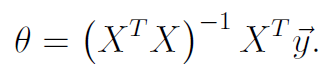


**Pseudo Code:**
1. Append ones to X, let say that as "X_appended" (This is to be done when there is intercept, if you know before hand that intercept is zero, then this step can be ignored)
2. Find the pseudo Inverse of the X_appended
3. Find the dot product of transpose of X_appended and target vector (y),
4. Find "theta" (parameters) using "Normal Equation" given above (i.e Matrix multiplication of outputs of Step 2 and Step 3)
5. Predict ouputs for X_new by appending it with ones and then using the formula $y=X_{new}\theta$

**Note : When you perform matrix multiplications or dot products on vectors or matrices, always keep track of the matrix or vectors shapes. This helps you in avoiding implementation errors.**

<div class="alert alert-block alert-warning">
**Implementation Note:** Step 1 is crucial. We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

In [4]:
# Import X, y from "dataset1.csv"
# X and y are numpy array, Hint : store the data in the pandas dataframe and then convert it to numpy array

data = pd.read_csv("dataset1.csv")
X = pd.DataFrame(data["X"])
y = data["y"]

X['Bias'] = 1
X_appended = X
X_appended = X_appended.to_numpy()
y = y.to_numpy()

In [9]:
theta_pred = np.linalg.inv(np.transpose(X_appended)@X_appended)@np.transpose(X_appended)@y

### 2.1 Function to predict the outputs
Implement the predict function below. Predict the outputs for the given data (dataset1.csv), plot the predicted outputs Vs input features and scatter plot for dataset1.csv (X,y)

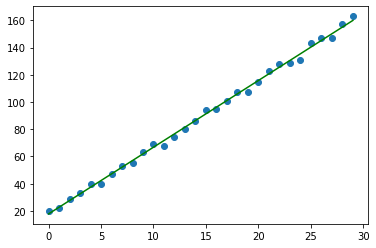

In [10]:
def predict(X, theta):
    """
    Predictions of X for a given theta.
    
    Parameters
    ----------
    X : array with size of (m x n)
    
    theta : array with size of (n+1, 1).
    
    Returns
    -------
    predictions : array of size (m x 1)
    
    """
    return X@theta

y_pred = predict(X_appended, theta_pred)
y_pred = predict(X_appended, theta_pred)
plt.plot(X_appended[:,0], y_pred, color='g')
plt.scatter(X_appended[:,0], y)

In [11]:
y, y_pred

(array([ 20.,  22.,  29.,  33.,  40.,  40.,  47.,  53.,  55.,  63.,  69.,
         68.,  74.,  80.,  86.,  94.,  95., 101., 107., 107., 115., 123.,
        128., 129., 131., 143., 147., 147., 157., 163.]),
 array([ 17.78924731,  22.6911383 ,  27.59302929,  32.49492028,
         37.39681127,  42.29870226,  47.20059325,  52.10248424,
         57.00437523,  61.90626622,  66.80815721,  71.7100482 ,
         76.61193919,  81.51383018,  86.41572117,  91.31761216,
         96.21950315, 101.12139414, 106.02328513, 110.92517612,
        115.82706711, 120.7289581 , 125.63084909, 130.53274008,
        135.43463107, 140.33652206, 145.23841305, 150.14030404,
        155.04219503, 159.94408602]))

# Section 3 : Linear Regression - Find the Regression parameters using Gradient Descent
This section is about applying gradient descent algorithm to find theta at which a cost function (Mean Squared Error) is minimum. This can be done using the gradient descent algorithm discussed in Section 1, where $x$ is replaced by the regression parameters. 

Refer to pseudo code in Section 1 for gradient descent algorithm. In simple terms, we initialise the regression parameters with some random number and we compute the gradient step to update the regression parameters.

### 3.1. Import and visualise the dataset

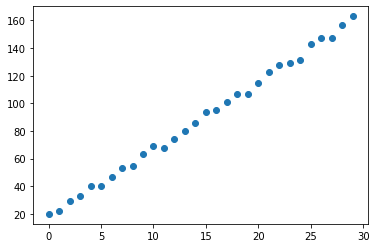

In [12]:
# Import the data from dataset1.csv - Same as Section 2
# Import X and y as numpy array, Hint : store the data in the pandas dataframe and then convert it to numpy array

data1 = pd.read_csv("dataset1.csv")
X = pd.DataFrame(data["X"])
y = data1["y"]
X['Bias'] = 1
X_appended = X
X_appended = X_appended.to_numpy()
y = y.to_numpy()

# Scatter Plot the data X and y for visualisation
plt.scatter(X_appended[:,0], y)

### 3.2. Compute Cost Function - Mean Squared Error (MSE) 
The cost function used is Mean Squared Error (MSE) represented as $J(\theta)$ and is given by:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is a linear model given by: 
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. This way you can know whether you choose high learning rate or low learning rate. Suppose if your learning rate is too high, you can see your cost will go up and down, but will not converge. If you choose good learning rate, then you can see your cost going down smoothly and converges.

In this you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

In [13]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array with the shape of (m x n+1)
        where m is the number of examples,n is the number of features
        n+1 == n features + 1 for bias term(intercept as a feature)
    
    y : array with the shape of (m,1)
    
    theta : array with the shape of (n+1,1)
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    # Write your code here
    J = (0.5*(1/len(y)))*np.sum(np.square(X@theta - y.reshape(len(y),1)))
    return J

## 3.3. Implementation of Gradient Descent 

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).


**Important implementation notes**

The function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a python list. If you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [14]:
def gradientDescent(X_appended, y, theta, alpha, precision = 0.001):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X_appended : array with shape of (m x n+1). Note : n+1 = n features + 1 intercept
    
    y : array with shape of (m, 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    precision : float, (One of the Stopping criteria). This is compared with the change in the cost from previous iter.
    
    Returns
    -------
    theta : array wih shape of (n+1,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    Count : Integer, Number of iterations taken to converge
    
    Cost : Float, Mean squared error at the end of the iteration
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # Write your code here
    J_history = []
    J_history.append(computeCost(X_appended, y, theta))
    dtheta = 100000
    count = 0
    while (1):   
        dtheta = (1 / len(y)) * np.dot(X_appended.T, (X_appended@theta - y.reshape(len(y),1)))          
        theta = theta - alpha * dtheta       
        J_history.append(computeCost(X_appended, y, theta))
        count = count + 1
        if ((J_history[count-1] - J_history[count])<precision):
            break
            
    cost = J_history[count]
    return theta, J_history, cost, count

### Run gradientDescent function to train the model here
**Note : Use the learning rate(alpha) and precision given below. Initialise theta with zeros is suggested here (but you can initialise with different numbers)**

Print the final theta (learnt parameters), number of iterations to converge, value of cost function at the convergence.

In [16]:
# initialize fitting parameters with zeros
theta = np.zeros((2,1))

# Play with these setting to see how these parameters play a huge, for a decent converge use below parameters
precision = 0.000001
alpha = 0.001

##################################### Your Code here ########################################
theta_pred = gradientDescent(X_appended, y, theta, alpha, precision)[0]
J_history = gradientDescent(X_appended, y, theta, alpha, precision)[1]
cost = gradientDescent(X_appended, y, theta, alpha, precision)[2]
count = gradientDescent(X_appended, y, theta, alpha, precision)[3]

print("No. of iterations required = ", count)
print("Minimum value of cost = ", cost)
print("Theta1 and bias are: ", theta_pred[0], theta_pred[1])

No. of iterations required =  18995
Minimum value of cost =  2.424134514167511
Theta1 and bias are:  [4.90802378] [17.6687466]


## 3.4. Plot the Training Curve
**Tip:** Initially the change in the loss(J) are drastic and dominating. So while plotting you may remove the first 10% of the iterations and then plot to see a smooth curve in the training process

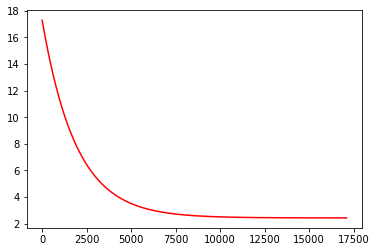

In [18]:
plt.plot(J_history[int(0.1*count):-1], color='r')

## 3.5. Predict Outputs and Plot the results
Same as Step 5 in the Section 2. You can use the same function predict(X, theta)

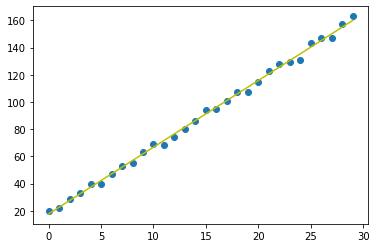

In [21]:
# plot a line for predictions and scatter plot for the training data X,y
y_pred = predict(X_appended, theta_pred)
plt.plot(X_appended[:,0], y_pred, color='y')
plt.scatter(X_appended[:,0], y)

# Section 4 : Selecting appropriate learning rate
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞. So dont worry even if you cost as inf or NaN

**Repeat the training as in Section 3 with different values of alpha as listed below. Print the alpha, cost and number of iterations it took for every alpha**

In [23]:
theta = np.zeros((2,1))
precision = 0.000001

# You can change this set of alphas and try out different, but keep your range less than 1
alphas = [0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007, 0.01,0.03, 0.05, 0.07, 0.1, 0.3]

dfcost = pd.DataFrame(index = alphas, columns = ["No. of Iterations", "Cost"])
# Write your code here
for alpha in alphas:
    costalpha = gradientDescent(X_appended, y, theta, alpha, precision)[2]
    countalpha = gradientDescent(X_appended, y, theta, alpha, precision)[3]
    print (costalpha, countalpha)
    dfcost.loc[alpha, "No. of Iterations"] = countalpha
    dfcost.loc[alpha, "Cost"] = costalpha
       
dfcost

2.4413078221495095 146029
2.4285868952040355 55663
2.4260422656254055 35347
2.424951548553128 26165
2.424134514167511 18995
2.4228624540119243 7029
2.4226074531485455 4412
4863.808530001111 1
16660.876472111107 1
276113.077049 1
850008.8966916668 1
1738348.3354001113 1
3660439.2792111114 1
34554887.00089999 1


,No. of Iterations,Cost
0.0001,146029,2.44131
0.0003,55663,2.42859
0.0005,35347,2.42604
0.0007,26165,2.42495
0.0010,18995,2.42413
0.0030,7029,2.42286
0.0050,4412,2.42261
0.0070,1,4863.81
0.0100,1,16660.9
0.0300,1,276113


## Section 5: Questions on Analytical and Gradient Descent approaches

1. Are the results from both the analytical and gradient descent approach are same? If not, why?
2. When do u prefer analytical approach and gradient descent approach? Hint: Explain interms of size of the dataset
3. Can we use different cost function in place of MSE? If we do, where will be changes in the gradient descent step?(Just mention using words, equations are not required)
4. How does the initialisation of the parameters $\theta$ effects the convergence? In this case we initialised $\theta$ to zeros. What happens if we choose closer to solution and farther to solution?
5. Any drawbacks of Gradient descent that you could think of? Hint : Interms of Convergence rate.
6. What if number of features increases and how does it effect the gradient descent approach and analytical approach? Note:This might require some time to look for appropriate concepts. But do note that this difference is very important to understand.
7. Comment your observations on selecting appropriate learning rate.

**Write your answers in the following Markdown**

1. Results are not the same but very close. Analytical method directly finds the point providing the lowest loss in the whole domain. Gradient descent on the other hand moves slowly towards a local minima using the gradients of loss function. The gradients become smaller and converge as an asymptote as it moves towards a minimum.

2. Analytical approach is prefered under a closed form solution for the equations resulting from putting the derivatives of the loss function to zero. Also, when the dataset is relatively small analytical approach is prefered as the complexity is O(n^3).
    Gradient based approaches dont require knowledge of the loss function in its entire domain. A closed form solution for gradient equations is also not needed. Approximations for first order derivatives can be made, which means the loss function need not be strictly differentiable at all points. Improper choice of gradient learning rate can lead to divergence which needs to be taken care of.
    
3. We can use mean absolute error (MAE) cost instead of MSE. The multiplication with learning rate will change. The gradient of each datapoint would be 1 if absolute difference is positive, and -1 if negative.

4. Convergence is afffected by initialization of 𝜃. For a sufficiently small learning rate, initialising closer to the optimum would result in faster convergence as compared to farther initialization. For more complicated functions initialization becomes important to reach convergence as initialisation from some points may get stuck in local minimas.

5. Gradient descent will work best when the loss function is smooth and has few distinct minima. Failures of Gradient Descent can be that as we reach closer to the optimum, gradient descent converges the cost slowly. Also, if the learning rate is not suitable then we may never reach an optimum.

6. As the number of features increases, calculating analytical solutions becomes more and more computationaly complex. Gradient descent is a better alternative in that case.The gradient descent approach, while not as computationally expensive, often faces overfitting if there are too many features. Each features comes with its own noise, which adds to the variance of the model. 

7. Learning rate is a trade off between training time and model precision. Small learning rates provide sufficient precision at the cost of sllow convergence (long training time). Large learning rates might learn quick but lie at the risk of oscillating or diverging on the loss function surface. Leaning rate just before the ones where no. of iterations become 1 must be selected because as the number of iterations reaches 1, those are the ones which face 'blowout'. For a learning rate of 0.01, convergence is achieved in less than 100 iterations, and hence is the best option among the ones we tried.